In [383]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import norm
from scipy.linalg import cholesky

## Task 1: Probability

#### A. Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $\Nu(x; 1; 1)$

In [384]:
n = 1000
mu = 1
sigma_2 = 1
x = np.random.normal(mu, sigma_2, n)
pdf = norm.pdf(x)

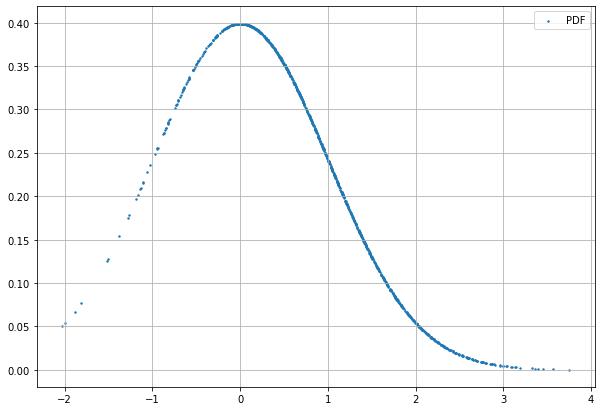

In [385]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf, label='PDF', s=2)
plt.legend()
plt.grid()

#### B. Calculate the probability mass that the random variable $X$ is less than 0, that is, $Pr\{X <= 0\} = \int^{0}_{-\infty}{p(x)dx}$

In [386]:
cdf = norm.cdf(x, loc=mu, scale=sigma_2)
p_mass = norm.cdf(0, loc=mu, scale=sigma_2)
print(f"P(X <= 0) = {p_mass:.4f}")

P(X <= 0) = 0.1587


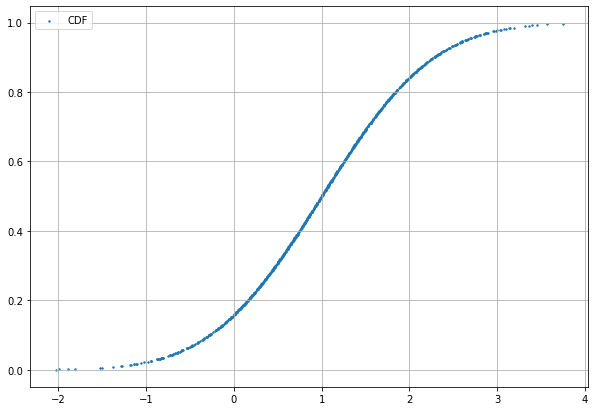

In [387]:
plt.figure(figsize=(10,7))
plt.scatter(x, cdf, label='CDF', s=2)
plt.legend()
plt.grid()

#### C. Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = \Nu(z; x; \sigma^2)$, with variance $\sigma^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.

In [388]:
z = 0.75
sigma_z_2 = 0.2
z_x = np.random.normal(z, sigma_z_2, n)
p_z_x = norm.pdf(z_x)

In [389]:
def p(x: float, mu: float, sigma_2: float) -> float:
    return np.exp(-0.5 * (x - mu) ** 2 / sigma_2) / np.sqrt(2 * np.pi * sigma_2)

In [390]:
p_x = p(x=z, mu=mu, sigma_2=sigma_2)
p_z = p(x=z, mu=z, sigma_2=sigma_z_2)
p_x_z = p_z_x * p_x / p_z

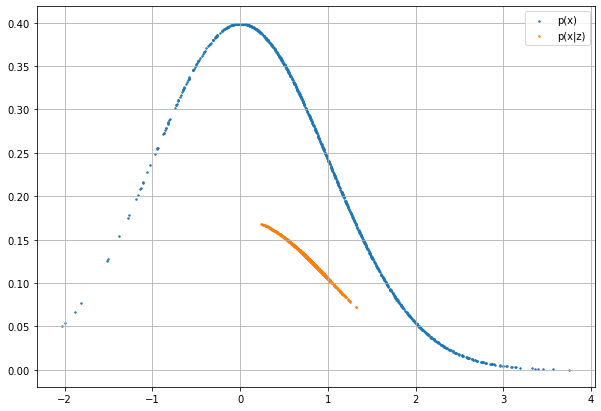

In [391]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf, label='p(x)', s=2)
plt.scatter(z_x, p_x_z, label='p(x|z)', s=2)
plt.legend()
plt.grid()

## Task 2: Multivariate Gaussian

#### A. Write the function plot2dcov which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc. Then, use plot2dcov to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions:

\begin{equation*} \Nu\bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}\bigg) \end{equation*}

\begin{equation*} \Nu\bigg(\begin{bmatrix} 5 \\ 0 \end{bmatrix}, \begin{bmatrix} 3 & -0.4 \\ -0.4 & 2 \end{bmatrix}\bigg) \end{equation*}

\begin{equation*} \Nu\bigg(\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 9.1 & 6 \\ 6 & 4 \end{bmatrix}\bigg) \end{equation*}

#### Use the set_aspect(’equal’) command and comment on them.

In [392]:
def plot2dcov(mean: np.ndarray, cov: np.ndarray, k: List, colors: List = ["r", "g", "b"], new_figure: bool = False, extra_label: str = "", legend: bool = True) -> None:
    L = cholesky(cov, lower=True)
    mean = mean.reshape((2, 1))
    size = 200
    step = 2 * np.pi / size
    points = np.zeros((2, size))
    if new_figure:
        plt.figure(figsize=(10, 10))
    for j in range(k):
        for i in range(size):
            point = np.array([
                [(j + 1) * np.cos(i * step)],
                [(j + 1) * np.sin(i * step)],
            ])
            points[:, i] = (L @ point + mean).flatten()
        plt.plot(points[0, :], points[1, :], color=colors[j], label=f"{j + 1}-sigma iso-contour {extra_label}")
    plt.axis('equal')
    if legend:
        plt.legend()
    plt.grid()
    return

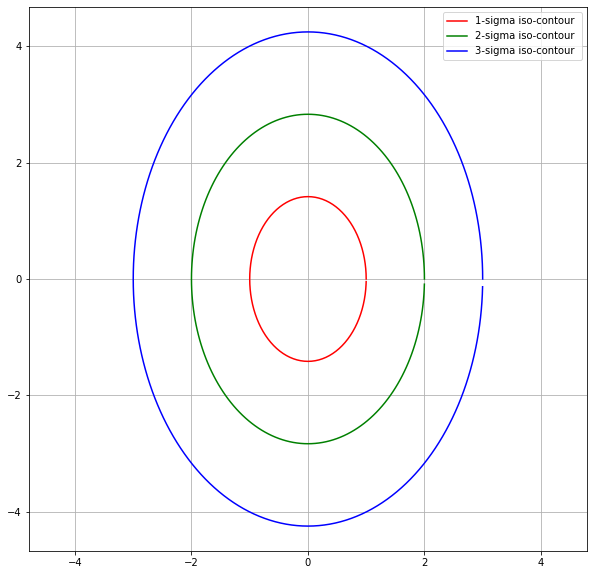

In [393]:
mu = np.array([[0], [0]])
sigma = np.array([
    [1, 0],
    [0, 2]
])
plot2dcov(mu, sigma, 3, new_figure=True)

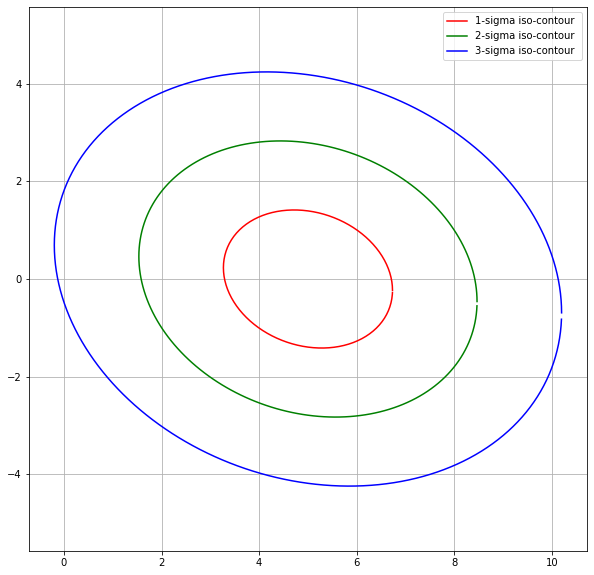

In [394]:
mu = np.array([[5], [0]])
sigma = np.array([
    [3, -0.4],
    [-0.4, 2]
])
plot2dcov(mu, sigma, 3, new_figure=True)

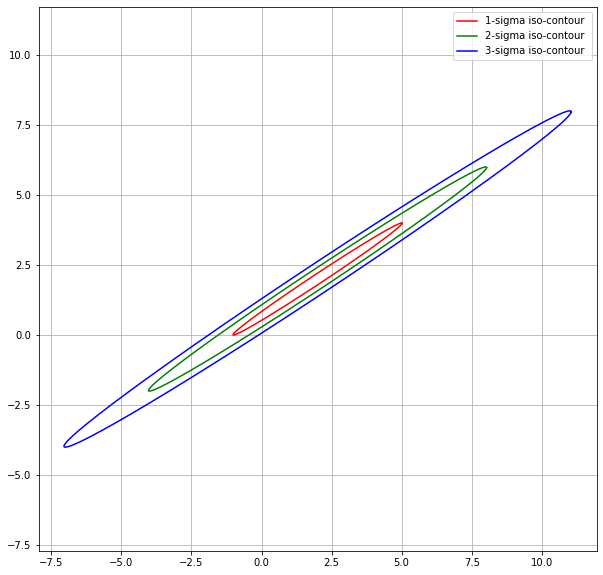

In [395]:
mu = np.array([[2], [2]])
sigma = np.array([
    [9.1, 6],
    [6, 4]
])
plot2dcov(mu, sigma, 3, new_figure=True)

#### B. Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as was shown during the lecture.

##### Sample mean: $\overline x = \frac 1 N \displaystyle\sum_{i=1}^N x_i$

##### Sample covariance: ${\overline {\Sigma}}_x = \frac 1 {N - 1} \displaystyle\sum_{i=1}^N (x_i - \overline x)(x_i - \overline x)^T$

#### C. Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $\Nu (0, 1)$. In particular, draw and plot 200 samples from:

\begin{equation*} \Nu\bigg(\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 9.1 & 1.3 \\ 1.3 & 3 \end{bmatrix}\bigg) \end{equation*}

#### Also plot their corresponding 1-sigma iso-contour. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.

In [396]:
def plot2dcov_with_cloud(cloud: np.ndarray, mean: np.ndarray, cov: np.ndarray, k: List, iso_colors: List = ["red", "green", "darkblue"], cloud_color: str = "black", new_figure: bool = True, legend: bool = True, sample_iso: bool = True) -> None:
    plot2dcov(mean, cov, k, colors=iso_colors, new_figure=new_figure, extra_label="(calculated)", legend=legend)
    if sample_iso:
        cloud_mu = cloud.mean(axis=0)
        cloud_sigma = np.cov(cloud.T)
        with np.printoptions(precision=4, suppress=True):
            print(f"Sample mean:\n {cloud_mu}")
            print(f"Sample covariance:\n {cloud_sigma}")
        plot2dcov(cloud_mu, cloud_sigma, 1, colors=["orange", "lime", "blue"], extra_label="(sample)", legend=legend)
    plt.scatter(cloud[:,0], cloud[:,1], color=cloud_color, label='Sample cloud', s=3)
    plt.axis('equal')
    plt.grid(visible=True)
    return

Sample mean:
 [1.9673 2.0103]
Sample covariance:
 [[1.3983 1.7276]
 [1.7276 3.1483]]


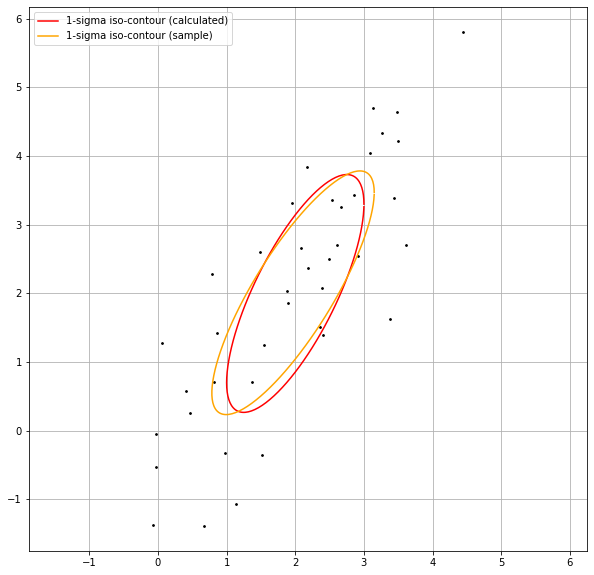

In [397]:
k = 40
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

Sample mean:
 [1.8797 1.8835]
Sample covariance:
 [[0.9955 1.4052]
 [1.4052 3.5196]]


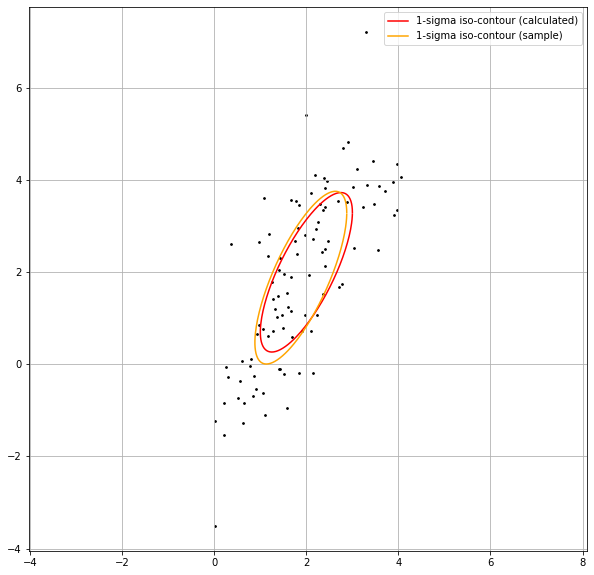

In [398]:
k = 100
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

Sample mean:
 [2.0246 2.2041]
Sample covariance:
 [[0.9459 1.1865]
 [1.1865 2.7113]]


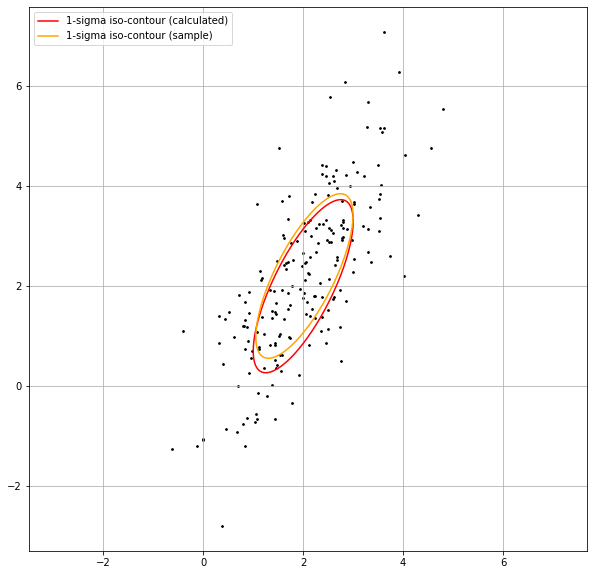

In [399]:
k = 200
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

Sample mean:
 [1.964  1.9838]
Sample covariance:
 [[0.9131 1.2716]
 [1.2716 3.1878]]


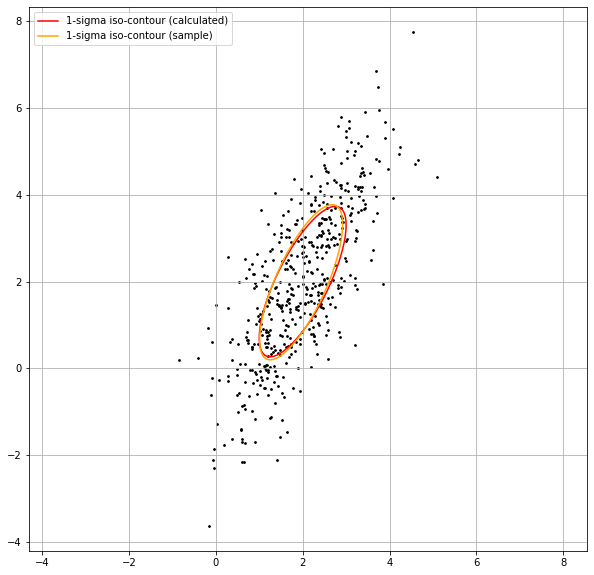

In [400]:
k = 500
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

## Task 3: Covariance Propagation

#### For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free point without restrictions. The propagation model is the following: 

\begin{equation*} {\begin{bmatrix} x \\ y \end{bmatrix}}_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} {\begin{bmatrix} x \\ y \end{bmatrix}}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} {\begin{bmatrix} v_x \\ v_y \end{bmatrix}}_{t-1} + {\begin{bmatrix} n_x \\ n_y \end{bmatrix}_t} \end{equation*}

#### where the controls $u={\begin{bmatrix} v_x & v_y\end{bmatrix}}^T$ are the velocities which are commanded to the robot. Unfortunately, there exists some uncertainty on command execution: 

\begin{equation*} {\begin{bmatrix} n_x \\ n_y \end{bmatrix}_t}\thicksim\Nu\bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}\bigg) \end{equation*}

#### We will consider a time step of $\Delta t=0.5$.

#### A. Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform.

##### Mean after single propagation:

  \begin{equation*} {\begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}}_t = {\begin{bmatrix} x + 0.5 v_x \\ y + 0.5 v_y \end{bmatrix}}_{t-1} \end{equation*}

##### Covariance after single propagation:

  \begin{equation*} \Sigma_t = \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix} \end{equation*}

#### B. How can we use this result iteratively?

#### C. Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0...5$ and the control sequence $u_t = [3, 0]^T$  for all times $t$. The PDF for the initial state is:

\begin{equation*} {\begin{bmatrix} x \\ y \end{bmatrix}_0}\thicksim\Nu\bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}\bigg) \end{equation*}

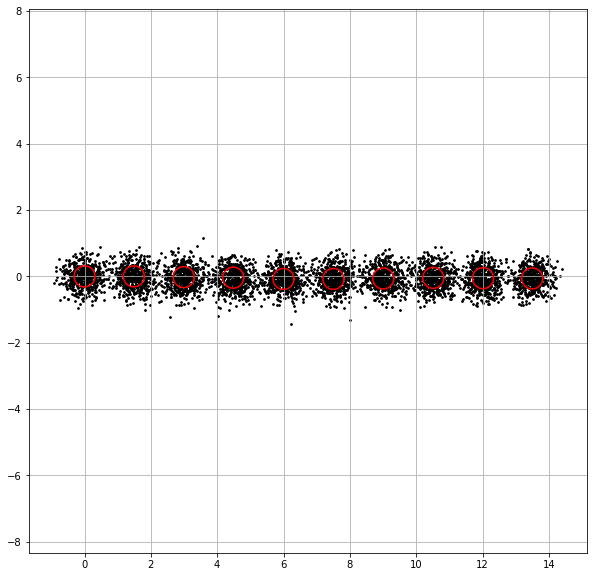

In [401]:
dt = 0.5
u = np.array([3, 0])
mu = np.array([0, 0])
cov = np.array([
    [0.1, 0],
    [0, 0.1]
])
new_figure = True
for i in range(10):
    cloud = np.random.multivariate_normal(mu, cov, 500)
    plot2dcov_with_cloud(cloud, mu, cov, 1, new_figure=new_figure, legend=False, sample_iso=False)
    cloud_mu = cloud.mean(axis=0)
    mu = cloud_mu + u * dt
    new_figure = False